In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import csv
import datetime as dt
import re
import time
import dateutil
dataUsageType = '/home/joe/data/datadog/by-usage-type.csv'
dfUsageType = pd.read_csv(dataUsageType)

In [30]:
dfUsageType.head(5)

,UsageType,APS3-DataTransfer-In-Bytes($),USW1-APN2-AWS-Out-Bytes($),USW1-USE2-AWS-In-Bytes($),DeliveryAttempts-SMTP($),USW2-NatGateway-Bytes($),USE1-USE2-AWS-Out-Bytes($),USW2-UGW1-AWS-Out-Bytes($),APS3-RDS:GP2-Storage($),EU-DataTransfer-In-Bytes($),...,JP-Requests-Tier2-HTTPS($),USE2-FreeEventsRecorded($),BoxUsage:t2.xlarge($),us-east-2-KMS-Requests($),USW1-EUW2-AWS-In-Bytes($),RDS:Multi-AZ-StorageUsage($),APS3-APS1-AWS-Out-Bytes($),HeavyUsage:m3.2xlarge($),USE1-EUC1-AWS-Out-Bytes($),Total cost ($)
0,UsageType Total,0,0.017371,0,0,3.800000e-07,171.055233,1.400000e-07,1.965004,0,...,11.641636,0,256.478,0.000042,0,12.053761,0.000014,16024.235540,1694.964273,4655484.685
1,Month 1,0,0.001450,0,0,NaN,68.021348,NaN,0.655003,0,...,4.146440,0,3.948,0.000006,0,4.053760,0.000005,5399.649936,613.066400,1554168.747
2,Month 2,0,0.007505,0,0,NaN,56.901303,NaN,0.654998,0,...,3.857268,0,98.528,0.000027,0,4.000003,0.000003,5225.467680,556.394938,1492007.023
3,Month 3,0,0.008416,0,0,3.800000e-07,46.132582,1.400000e-07,0.655003,0,...,3.637927,0,154.002,0.000009,0,3.999997,0.000006,5399.117927,525.502935,1609308.915


In [31]:
dfUsageType.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Columns: 710 entries, UsageType to Total cost ($)
dtypes: float64(559), int64(150), object(1)
memory usage: 22.3+ KB


In [32]:
dataUsageTransposed = '/home/joe/data/datadog/by-usage-transposed.csv'
dfUsgT = pd.read_csv(dataUsageTransposed).fillna(0)
dfUsgT

,UsageType,UsageType Total,Month 1,Month 2,Month 3
0,APS3-DataTransfer-In-Bytes($),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,USW1-APN2-AWS-Out-Bytes($),1.737100e-02,1.450070e-03,7.504540e-03,8.416390e-03
2,USW1-USE2-AWS-In-Bytes($),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,DeliveryAttempts-SMTP($),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,USW2-NatGateway-Bytes($),3.800000e-07,0.000000e+00,0.000000e+00,3.800000e-07
...,...,...,...,...,...
704,RDS:Multi-AZ-StorageUsage($),1.205376e+01,4.053760e+00,4.000003e+00,3.999997e+00
705,APS3-APS1-AWS-Out-Bytes($),1.370000e-05,5.450000e-06,2.700000e-06,5.560000e-06
706,HeavyUsage:m3.2xlarge($),1.602424e+04,5.399650e+03,5.225468e+03,5.399118e+03
707,USE1-EUC1-AWS-Out-Bytes($),1.694964e+03,6.130664e+02,5.563949e+02,5.255029e+02


In [33]:
dfUsgT['UsageType'] = dfUsgT['UsageType'].replace({'\$':''}, regex=True).astype(str)
dfUsgT['UsageType'] = dfUsgT['UsageType'].replace({'\(\)':''}, regex=True).astype(str)
dfUsgT

,UsageType,UsageType Total,Month 1,Month 2,Month 3
0,APS3-DataTransfer-In-Bytes,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,USW1-APN2-AWS-Out-Bytes,1.737100e-02,1.450070e-03,7.504540e-03,8.416390e-03
2,USW1-USE2-AWS-In-Bytes,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,DeliveryAttempts-SMTP,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,USW2-NatGateway-Bytes,3.800000e-07,0.000000e+00,0.000000e+00,3.800000e-07
...,...,...,...,...,...
704,RDS:Multi-AZ-StorageUsage,1.205376e+01,4.053760e+00,4.000003e+00,3.999997e+00
705,APS3-APS1-AWS-Out-Bytes,1.370000e-05,5.450000e-06,2.700000e-06,5.560000e-06
706,HeavyUsage:m3.2xlarge,1.602424e+04,5.399650e+03,5.225468e+03,5.399118e+03
707,USE1-EUC1-AWS-Out-Bytes,1.694964e+03,6.130664e+02,5.563949e+02,5.255029e+02


In [34]:
df = dfUsgT.UsageType.str.split(":",n=1,expand=True)
df

,0,1
0,APS3-DataTransfer-In-Bytes,None
1,USW1-APN2-AWS-Out-Bytes,None
2,USW1-USE2-AWS-In-Bytes,None
3,DeliveryAttempts-SMTP,None
4,USW2-NatGateway-Bytes,None
...,...,...
704,RDS,Multi-AZ-StorageUsage
705,APS3-APS1-AWS-Out-Bytes,None
706,HeavyUsage,m3.2xlarge
707,USE1-EUC1-AWS-Out-Bytes,None


In [35]:
dfUsgT['meta'] = df[0]
dfUsgT['type'] = df[1]
dfUsgT

,UsageType,UsageType Total,Month 1,Month 2,Month 3,meta,type
0,APS3-DataTransfer-In-Bytes,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,APS3-DataTransfer-In-Bytes,None
1,USW1-APN2-AWS-Out-Bytes,1.737100e-02,1.450070e-03,7.504540e-03,8.416390e-03,USW1-APN2-AWS-Out-Bytes,None
2,USW1-USE2-AWS-In-Bytes,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,USW1-USE2-AWS-In-Bytes,None
3,DeliveryAttempts-SMTP,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,DeliveryAttempts-SMTP,None
4,USW2-NatGateway-Bytes,3.800000e-07,0.000000e+00,0.000000e+00,3.800000e-07,USW2-NatGateway-Bytes,None
...,...,...,...,...,...,...,...
704,RDS:Multi-AZ-StorageUsage,1.205376e+01,4.053760e+00,4.000003e+00,3.999997e+00,RDS,Multi-AZ-StorageUsage
705,APS3-APS1-AWS-Out-Bytes,1.370000e-05,5.450000e-06,2.700000e-06,5.560000e-06,APS3-APS1-AWS-Out-Bytes,None
706,HeavyUsage:m3.2xlarge,1.602424e+04,5.399650e+03,5.225468e+03,5.399118e+03,HeavyUsage,m3.2xlarge
707,USE1-EUC1-AWS-Out-Bytes,1.694964e+03,6.130664e+02,5.563949e+02,5.255029e+02,USE1-EUC1-AWS-Out-Bytes,None


In [36]:
dfg = dfUsgT.groupby('meta').sum()[['Month 1', 'Month 2', 'Month 3']].sort_values('Month 3', ascending=False)
dfg = dfg.reset_index()

In [37]:
dfgBox = dfg[dfg.meta.str.contains('Box', regex=True, na=False)]
dfg = dfg[~dfg.meta.str.contains('Box', regex=True, na=False)] # remove Box

In [38]:
dfgBox

,meta,Month 1,Month 2,Month 3
1,BoxUsage,444367.630713,501304.35225,645625.093535
36,USW2-BoxUsage,417.207800,404.26800,418.873800
38,EU-BoxUsage,272.304000,263.52000,272.304000
42,EUW2-BoxUsage,186.744000,180.72000,186.744000
44,USW1-BoxUsage,105.700000,146.25000,151.130000
47,USE2-BoxUsage,186.768000,148.32000,133.524000
80,APN2-BoxUsage,19.088000,23.04000,23.808000
94,SAE1-BoxUsage,14.880000,14.40000,14.880000
97,APS2-BoxUsage,11.904000,11.52000,11.904000
98,APS3-BoxUsage,11.160000,10.80000,11.160000


In [39]:
dfgTransfer = dfg[dfg.meta.str.contains('Bytes', regex=True, na=False)]
dfg = dfg[~dfg.meta.str.contains('Bytes', regex=True, na=False)] # remove Transfer
dfgTransfer

,meta,Month 1,Month 2,Month 3
3,DataTransfer-Regional-Bytes,263047.387000,224787.390200,221015.367200
7,DataProcessing-Bytes,43540.736280,41511.104510,37532.445290
8,DataTransfer-Out-Bytes,36776.140250,33646.815690,33019.041120
12,USE1-USW2-AWS-Out-Bytes,5364.631659,4845.499749,4764.605672
13,US-DataTransfer-Out-Bytes,5685.355652,5362.916900,4633.430738
...,...,...,...,...
553,USE1-APN1-AWS-In-Bytes,0.000000,0.000000,0.000000
554,APS3-APN1-AWS-In-Bytes,0.000000,0.000000,0.000000
556,APS3-APS1-AWS-In-Bytes,0.000000,0.000000,0.000000
557,APS3-DataTransfer-In-Bytes,0.000000,0.000000,0.000000


In [40]:
dfg

,meta,Month 1,Month 2,Month 3
0,Total cost,1.554169e+06,1.492007e+06,1.609309e+06
2,HeavyUsage,3.819385e+05,3.343260e+05,3.087975e+05
4,TimedStorage-ByteHrs,1.537222e+05,1.351279e+05,1.336578e+05
5,SpotUsage,5.055723e+04,6.917552e+04,8.398038e+04
6,Dollar,5.500000e+04,5.500000e+04,5.500000e+04
...,...,...,...,...
538,APS3-ReadCapacityUnit-Hrs,0.000000e+00,0.000000e+00,0.000000e+00
543,APS2-FreeEventsRecorded,0.000000e+00,0.000000e+00,0.000000e+00
544,EU-PaidEventsRecorded,1.499580e+00,1.293920e+00,0.000000e+00
552,APS2-PaidEventsRecorded,1.338640e+00,1.204000e+00,0.000000e+00


In [41]:
dfgEBS = dfg[dfg.meta.str.contains('EBS', regex=True, na=False)]
dfg = dfg[~dfg.meta.str.contains('EBS', regex=True, na=False)] # remove EBS
dfgEBS

,meta,Month 1,Month 2,Month 3
17,EBS,5052.089128,3422.822474,3047.255153
70,USW2-EBS,35.670091,35.629266,37.062902
71,EUW2-EBS,34.281925,34.281923,34.281925
92,EU-EBS,16.072548,16.072963,16.071338
113,USW1-EBS,5.961499,6.722788,6.722787
130,USE2-EBS,3.047585,2.399998,2.174196
137,APN2-EBS,1.462391,1.824005,1.824005
138,SAE1-EBS,1.519999,1.519999,1.519999
142,APS2-EBS,0.959998,0.959998,0.959998
143,APS1-EBS,0.959998,0.959998,0.959998


In [42]:
dfgCW = dfg[dfg.meta.str.contains('CW', regex=True, na=False)]
dfg = dfg[~dfg.meta.str.contains('CW', regex=True, na=False)] # remove CW
dfgCW

,meta,Month 1,Month 2,Month 3
10,CW,12333.359038,8543.153372,8002.681558
35,USW2-CW,476.548504,385.479051,446.439098
50,EU-CW,87.079030,68.631250,91.556257
55,APS3-CW,84.061190,69.512370,76.777047
58,USE2-CW,64.366580,51.924137,61.939466
62,USW1-CW,79.231560,61.141380,48.785287
72,APN2-CW,27.913510,24.025120,29.665977
76,EUW2-CW,26.789410,21.420420,25.173847
78,APS2-CW,22.839870,19.190120,24.763367
79,CAN1-CW,22.888080,19.175050,24.727567


In [43]:
dfgRequests = dfg[dfg.meta.str.contains('Requests', regex=True, na=False)]
dfg = dfg[~dfg.meta.str.contains('Requests', regex=True, na=False)] # remove Requests
dfgRequests

,meta,Month 1,Month 2,Month 3
9,Requests-Tier1,33859.246540,29958.810240,28654.036980
16,Requests-Tier2,4052.736976,3797.846151,3370.668046
39,US-Requests-Tier1,190.457570,188.040880,205.485921
40,us-east-1-KMS-Requests,240.395427,223.241452,203.008187
52,US-Requests-Tier2-HTTPS,82.335247,79.300949,81.613211
...,...,...,...,...
420,EUW2-Requests-Tier2,0.001900,0.000000,0.000000
430,Requests-SIA-Tier1,0.000010,0.000010,0.000000
431,Requests-FIFO-RBP,0.000000,0.065068,0.000000
438,AU-Requests-HTTP-Proxy,0.000182,0.000054,0.000000


In [44]:
dfgS3Storage = dfg[dfg.meta.str.contains('ByteHrs', regex=True, na=False)]
dfg = dfg[~dfg.meta.str.contains('ByteHrs', regex=True, na=False)] # remove ByteHrs
dfgS3Storage

,meta,Month 1,Month 2,Month 3
4,TimedStorage-ByteHrs,153722.211200,135127.863300,133657.751200
43,EUC1-TimedStorage-ByteHrs,270.142246,228.955044,185.942982
87,USW2-TimedStorage-ByteHrs,20.239213,19.667854,18.981651
91,TimedStorage-SIA-ByteHrs,30.919181,23.066742,16.548374
119,USW2-TimedStorage-GlacierByteHrs,4.760515,4.760515,4.760515
136,TimedStorage-RRS-ByteHrs,1.835802,1.835802,1.836631
153,EU-TimedStorage-ByteHrs,0.449449,0.449449,0.449449
169,TimedStorage-GlacierByteHrs,0.027951,0.026886,0.025937
187,APN1-TimedStorage-ByteHrs,0.012119,0.012119,0.012119
209,EUC1-TimedStorage-SIA-ByteHrs,0.001480,0.001438,0.001384


In [45]:
sumBox = dfgBox.sum(axis=0)
dfBox = pd.DataFrame(sumBox)
dfBox = dfBox.drop(['meta'])
dfBox

,0
Month 1,445743
Month 2,502527
Month 3,646870


In [46]:
sumTransfer = dfgTransfer.sum(axis=0)
dfTransfer = pd.DataFrame(sumTransfer)
dfTransfer = dfTransfer.drop(['meta'])
dfTransfer

,0
Month 1,370141
Month 2,318857
Month 3,308265


In [47]:
sumEBS = dfgEBS.sum(axis=0)
dfEBS = pd.DataFrame(sumEBS)
dfEBS = dfEBS.drop(['meta'])
dfEBS

,0
Month 1,5156.31
Month 2,3524.99
Month 3,3150.94


In [48]:
sumCW = dfgCW.sum(axis=0)
dfCW = pd.DataFrame(sumCW)
dfCW = dfCW.drop(['meta'])
dfCW

,0
Month 1,13298.7
Month 2,9310.36
Month 3,8888.08


In [49]:
sumRequests = dfgRequests.sum(axis=0)
dfRequests = pd.DataFrame(sumRequests)
dfRequests = dfRequests.drop(['meta'])
dfRequests

,0
Month 1,38557
Month 2,34371.7
Month 3,32655.2


In [50]:
sumS3Storage = dfgS3Storage.sum(axis=0)
dfS3Storage = pd.DataFrame(sumS3Storage)
dfS3Storage = dfS3Storage.drop(['meta'])
dfS3Storage

,0
Month 1,154052
Month 2,135407
Month 3,133886


In [51]:
# combine them all back
df = dfg.set_index('meta').T
df['Box'] = dfBox[0]
df['Transfer'] = dfTransfer[0]
df['EBS'] = dfEBS[0]
df['CW'] = dfCW[0]
df['Requests'] = dfRequests[0]
df['S3Storage'] = dfS3Storage[0]
df = df.drop(['Total cost ','Dollar'],axis=1)
df = df.T.sort_values('Month 3', ascending=False)
df

,Month 1,Month 2,Month 3
meta,,,
Box,445743,502527,646870
HeavyUsage,381938,334326,308797
Transfer,370141,318857,308265
S3Storage,154052,135407,133886
SpotUsage,50557.2,69175.5,83980.4
...,...,...,...
EUW2-FreeEventsRecorded,0,0,0
Geo-Queries,0.0003437,0,0
Recipients-EC2,0,0,0


In [52]:
df = df.T.reset_index()
df = df.rename(columns={'index':'Months'})
regex = re.compile(r'Month\s+', flags=re.IGNORECASE)
df['Months'] = df['Months'].str.replace(regex,'')
df

meta,Months,Box,HeavyUsage,Transfer,S3Storage,SpotUsage,Requests,CW,Multi-AZUsage,ESInstance,...,USW2-AW-HW-1-AutoStop-Usage,USW2-AW-HW-1-AutoStop-User,USW2-AW-SW-1,Health-Check-AWS,EUW2-PaidEventsRecorded,EUW2-FreeEventsRecorded,Geo-Queries,Recipients-EC2,APS3-WriteCapacityUnit-Hrs,USE2-WriteCapacityUnit-Hrs
0,1,445743,381938,370141,154052,50557.2,38557,13298.7,6695.94,8027.05,...,0,0,0,0,2.41234,0,0.0003437,0,0,0
1,2,502527,334326,318857,135407,69175.5,34371.7,9310.36,6403.88,5027.89,...,0,0,0,0,0.8793,0,0,0,0,0
2,3,646870,308797,308265,133886,83980.4,32655.2,8888.08,5999.96,4334.82,...,0,0,0,0,0,0,0,0,0,0


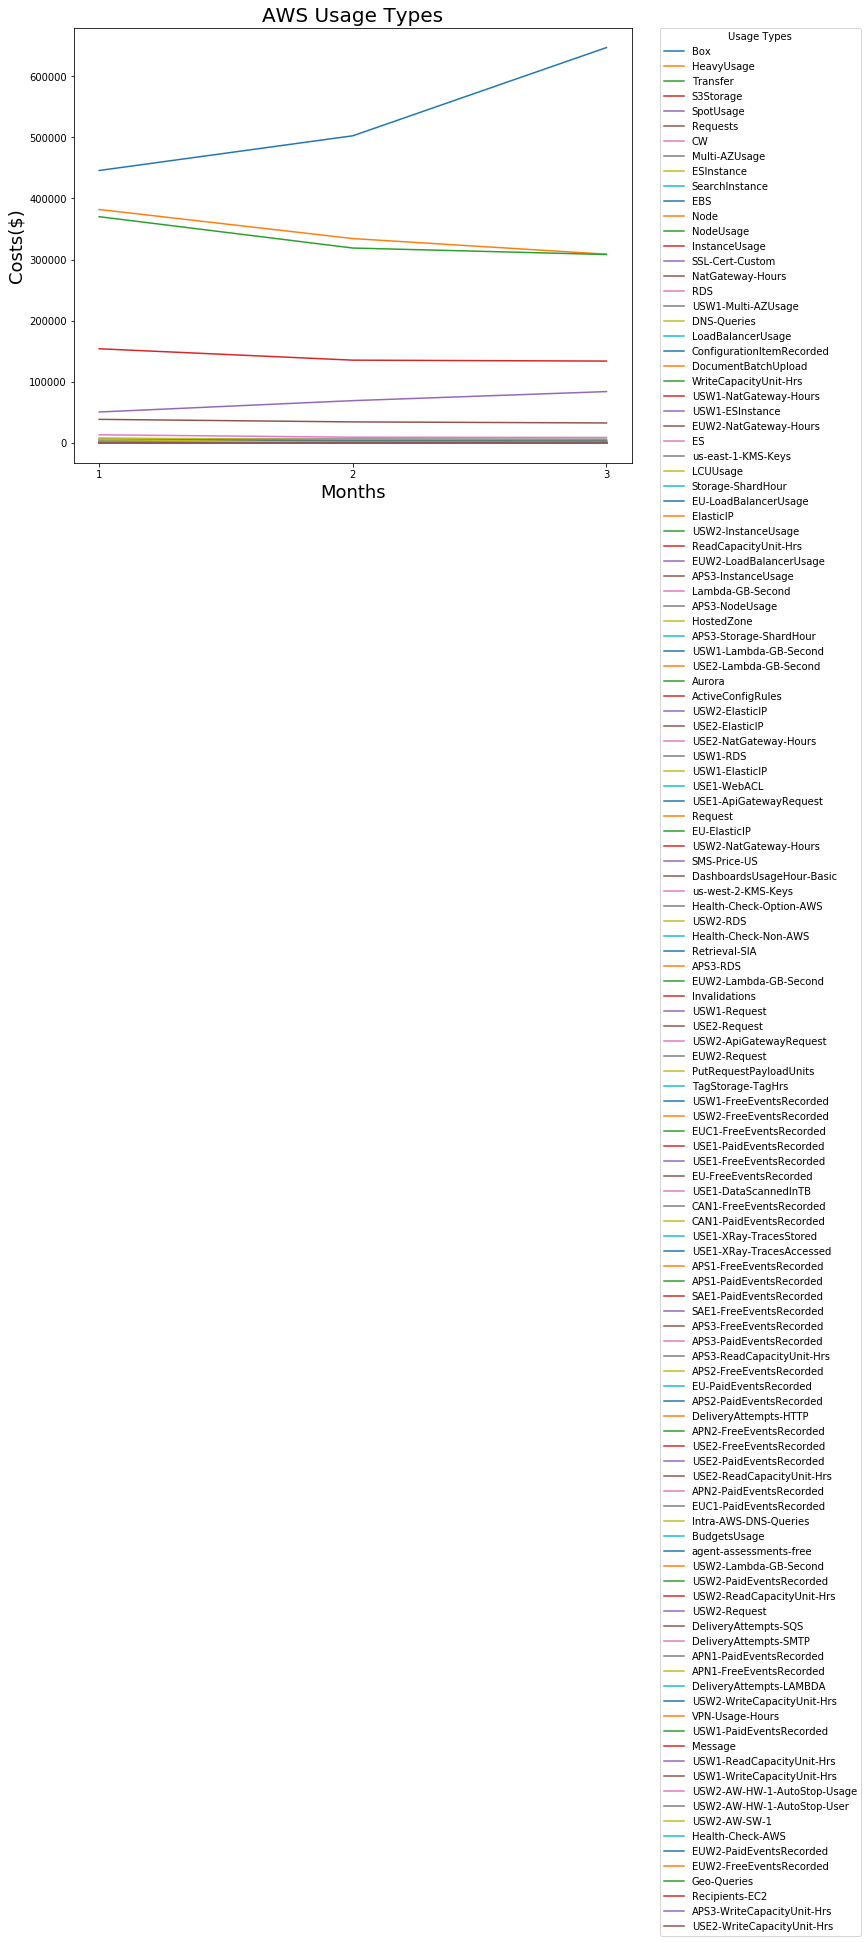

In [53]:
fig = plt.figure(figsize=(10,8))
ax=plt.gca()
ax.set_title("AWS Usage Types", fontsize=20)
ax.set_ylabel("Costs($)", color='black', fontsize=18)
ax.set_xlabel("Months", color='black', fontsize=18)

cols = df.columns.values.tolist()
cols.pop(0)

colsList = []
colsLabels = []
for col in cols:
    df[col]= df[col].astype(float)
    plt.plot(df['Months'],df[col])
    colsList.append(df[col])
    colsLabels.append(col)

plt.legend(cols,title="Usage Types",bbox_to_anchor=(1.05,1),loc='upper left', borderaxespad=0)
plt.show()

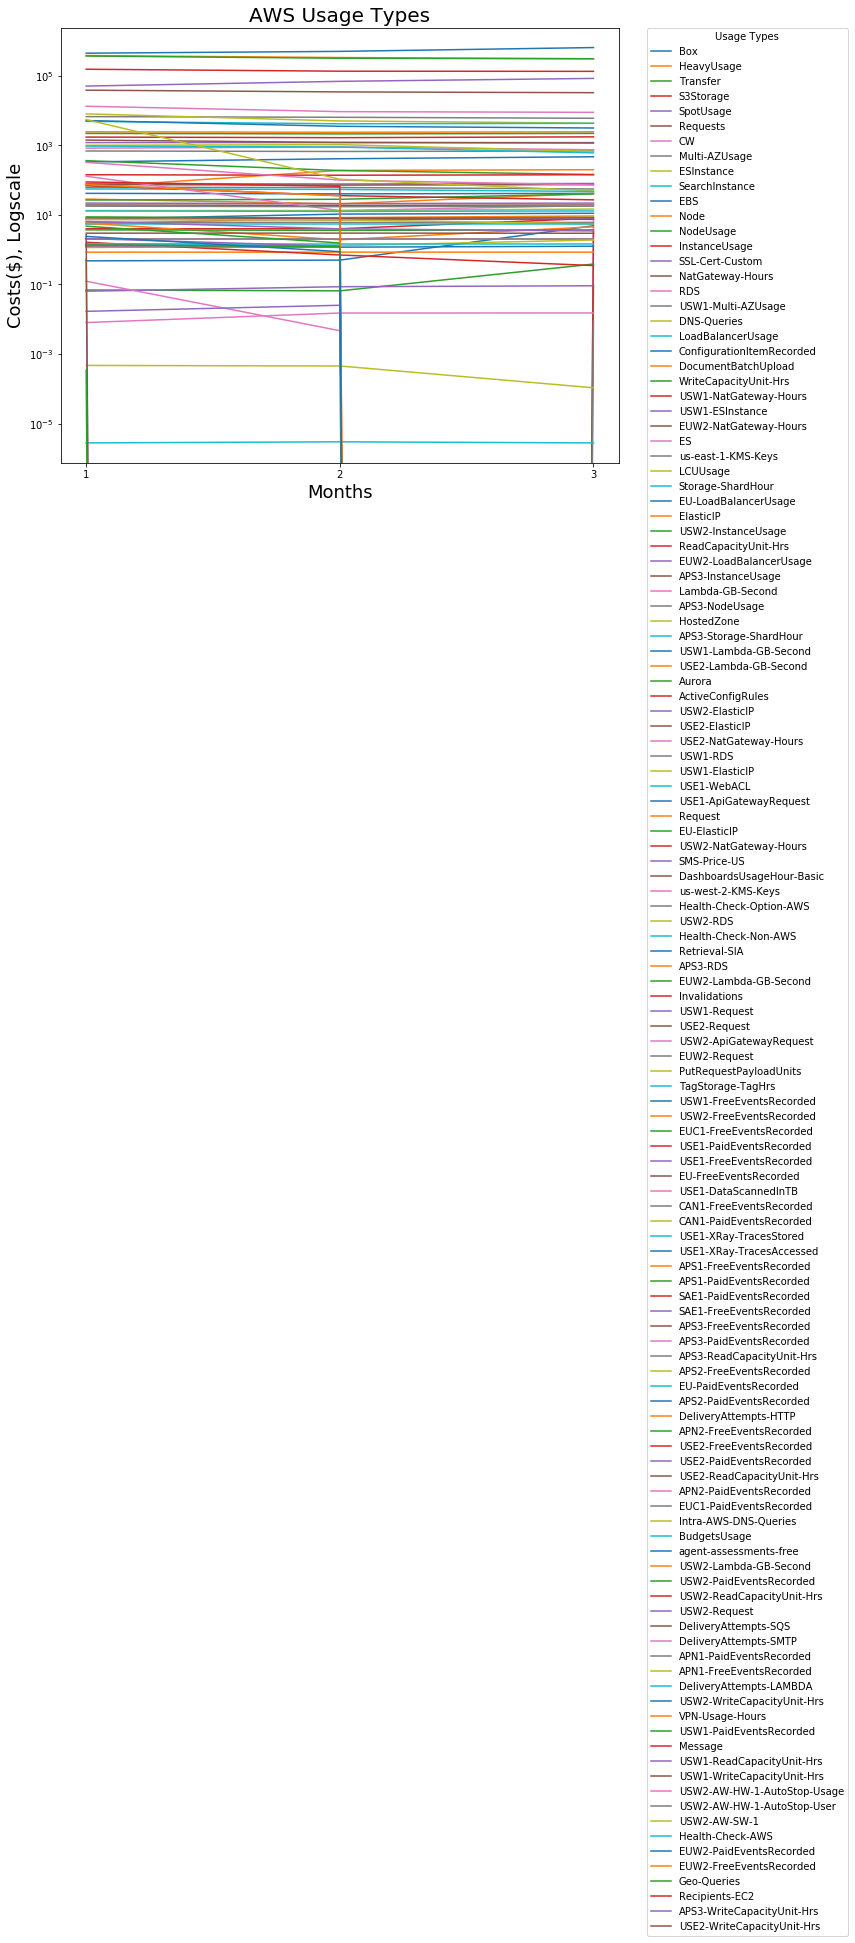

In [54]:
fig = plt.figure(figsize=(10,8))
ax=plt.gca()
ax.set_title("AWS Usage Types", fontsize=20)
ax.set_ylabel("Costs($), Logscale", color='black', fontsize=18)
ax.set_xlabel("Months", color='black', fontsize=18)
ax.set_yscale('log')

for col in cols:
    plt.plot(df['Months'],df[col])

plt.legend(cols,title="Usage Types",bbox_to_anchor=(1.05,1),loc='upper left', borderaxespad=0)
plt.show()

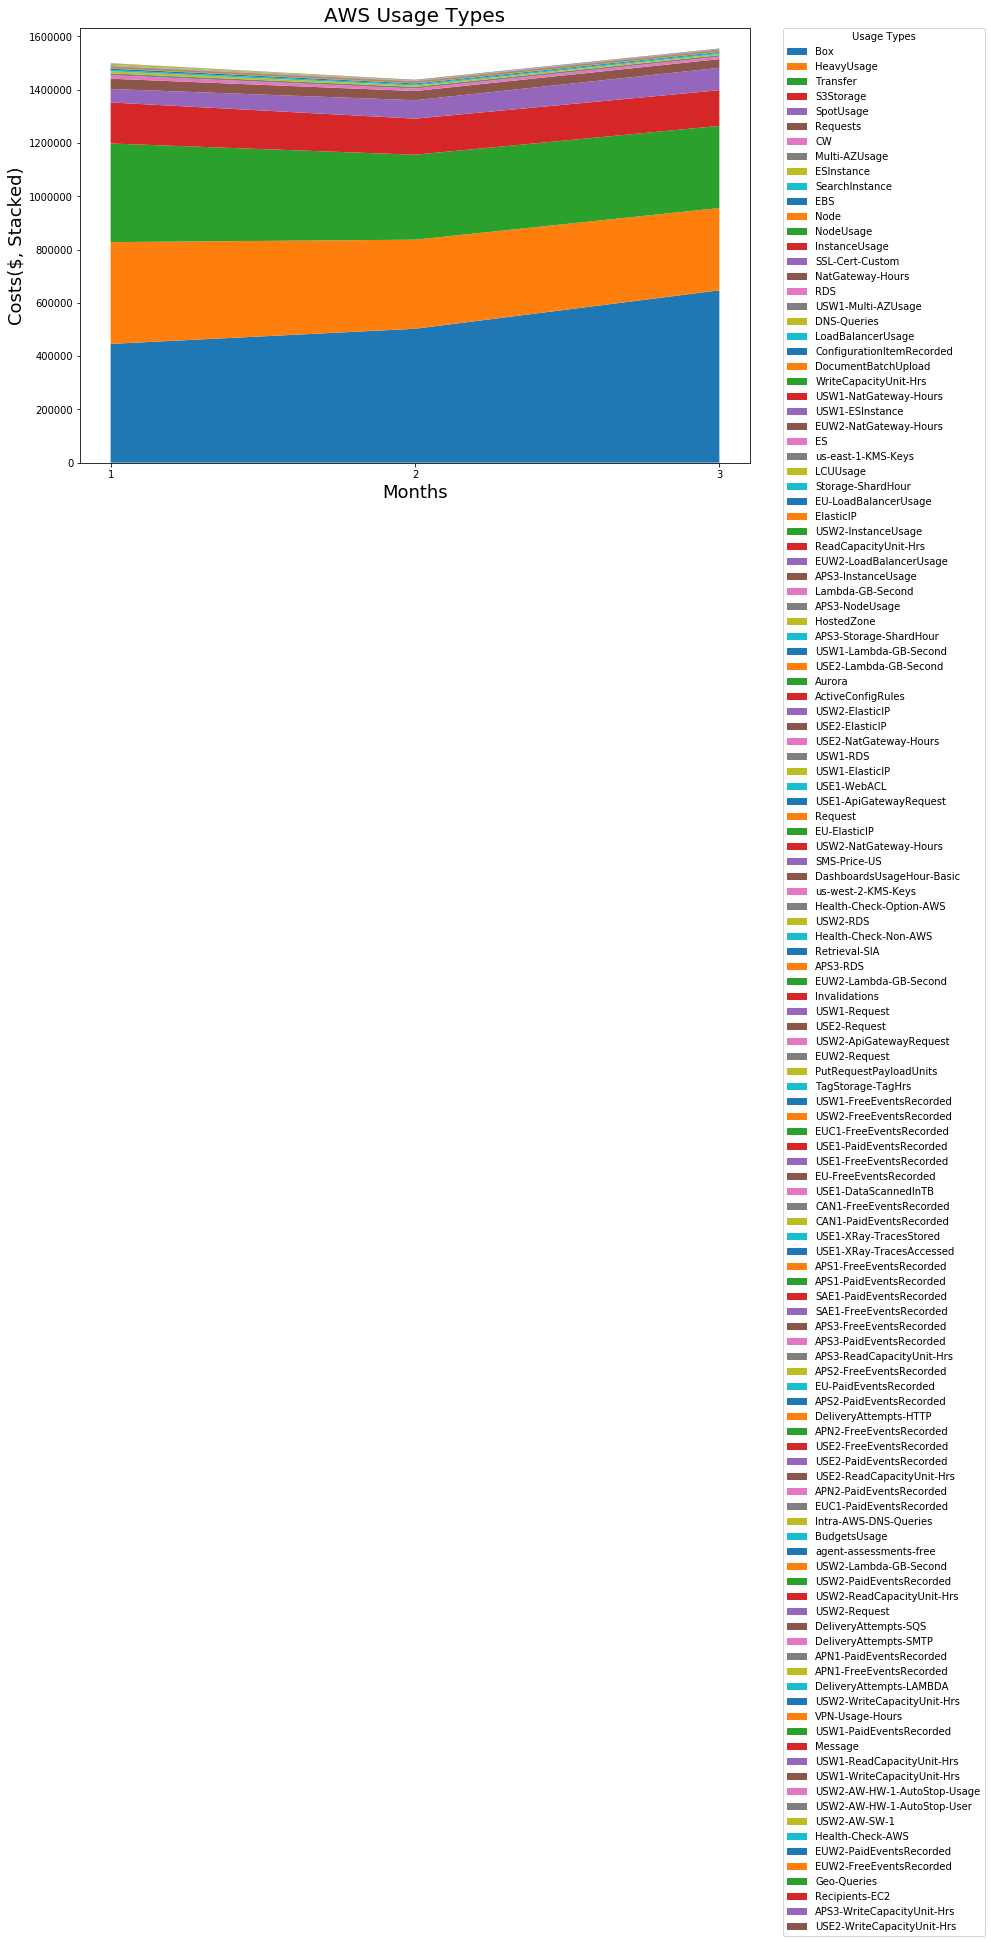

In [55]:
figArea = plt.figure(figsize=(12,8))
ax=plt.gca()
ax.set_title("AWS Usage Types", fontsize=20)
ax.set_ylabel("Costs($, Stacked)", color='black', fontsize=18)
ax.set_xlabel("Months", color='black', fontsize=18)

plt.stackplot(df['Months'],colsList,labels=colsLabels)
plt.legend(loc='upper left',title='Usage Types',bbox_to_anchor=(1.05,1),borderaxespad=0)